# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [172]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime, timedelta
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [173]:
# Read your api key environment variable

#os.loadenv('newsapi')
api_key = "5e3ba89b67f849e6bab8e1ec1f9d8d8e"

In [174]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [175]:
# Fetch the Bitcoin news articles

btc_articles = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy", page=1)

In [176]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy", page=1)

In [177]:
# Create the Bitcoin sentiment scores DataFrame
def get_sentiment_score(article, based_on):
    sentiments = []
    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text,
            })
        except AttributeError:
            pass
    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

btc_df = get_sentiment_score(btc_articles, 'content')
btc_df

,Compound,Negative,Neutral,Positive,content
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
4,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...
5,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...
6,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."
7,0.0258,0.073,0.850,0.076,image copyrightGetty Images\r\nBitcoin has hit...
8,0.0000,0.000,1.000,0.000,Six years after the launch of the Mexico-based...
9,0.4019,0.000,0.883,0.117,Decentralized exchange protocols that allow cr...


In [178]:
# Create the ethereum sentiment scores DataFrame
eth_df = get_sentiment_score(eth_articles, 'content')
eth_df

,Compound,Negative,Neutral,Positive,content
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...
1,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...
2,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...
3,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...
4,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...
5,0.1779,0.000,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...
6,0.1779,0.000,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...
7,0.3612,0.000,0.932,0.068,NEW YORK (Reuters) - Total investor inflows in...
8,0.2500,0.000,0.938,0.062,"December\r\n15, 2020\r\n6 min read\r\nOpinions..."
9,0.4019,0.000,0.883,0.117,Decentralized exchange protocols that allow cr...


In [179]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.245065,0.015900,0.906650,0.077400
std,0.370957,0.033444,0.076396,0.074368
min,-0.585900,0.000000,0.781000,0.000000
25%,0.000000,0.000000,0.847000,0.000000
50%,0.237750,0.000000,0.900000,0.074000
75%,0.554250,0.000000,1.000000,0.139000
max,0.801600,0.103000,1.000000,0.209000


In [180]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.100411,0.019053,0.937526,0.043421
std,0.264001,0.039279,0.070606,0.053601
min,-0.493900,0.000000,0.753000,0.000000
25%,0.000000,0.000000,0.892000,0.000000
50%,0.000000,0.000000,0.948000,0.000000
75%,0.213950,0.000000,1.000000,0.067000
max,0.636900,0.119000,1.000000,0.144000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: BTC

Q. Which coin had the highest positive score?

A: BTC

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [181]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [182]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()
sw = set(stopwords.words('english'))

In [211]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = [word.lower() for word in words if word not in sw]
    # Remove the punctuation
    regex = re.compile('[^a-zA-Z ]')
    words = [regex.sub('', word) for word in words]
    # Lemmatize Words into root words
    output = []
    words = [output.append(lemmatizer.lemmatize(word)) for word in words if word != ""]
    return output


In [212]:
# Create a new tokens column for bitcoin
btc_df['tokens'] = btc_df['content'].apply(tokenizer)
btc_df['tokens']

0     [visa, partnered, cryptocurrency, startup, blo...
1     [after, reaching, previous, alltime, high, nov...
2     [it, almost, three, year, day, since, price, b...
3     [everything, dumb, work, a, come, close, crypt...
4     [the, government, india, considering, tax, bit...
5     [the, security, exchange, commission, plan, su...
6     [unlike, conventional, cryptocurrencies, centr...
7     [image, copyrightgetty, image, bitcoin, hit, n...
8     [six, year, launch, mexicobased, crypotcurrenc...
9     [decentralized, exchange, protocol, allow, cry...
10    [u, market, ended, november, large, gain, even...
11    [illustration, grayson, blackmon, the, verge, ...
12    [poster, participating, the, price, one, bitco...
13    [by, reuters, staff, file, photo, representati...
14    [by, reuters, staff, file, photo, a, represent...
15    [business, news, fergal, smith, maiya, keidan,...
16    [posted, bitcoin, grabbed, headline, week, asc...
17    [posted, comprehensive, wealth, management

In [213]:
# Create a new tokens column for ethereum
eth_df['tokens'] = eth_df['content'].apply(tokenizer)

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [214]:
from collections import Counter
from nltk import ngrams

In [215]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = ngrams(btc_df['tokens'], n=2)

In [216]:
# Generate the Ethereum N-grams where N=2
eth_bigrams = ngrams(eth_df['tokens'], n=2)

In [217]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    words = []
    for row in tokens:
        words += row
    tokens = words
    return Counter(tokens).most_common(N)

In [218]:
# Get the top 10 words for Bitcoin
btc_top_10 = token_count(btc_df['tokens'], N=11)
btc_top_10

[('char', 20),
 ('bitcoin', 14),
 ('reuters', 9),
 ('the', 8),
 ('cryptocurrency', 6),
 ('year', 5),
 ('a', 5),
 ('illustration', 5),
 ('photo', 5),
 ('alltime', 4),
 ('november', 4)]

In [219]:
# Get the top 10 words for Ethereum
eth_top_10 = token_count(eth_df['tokens'], N=11)
eth_top_10

[('char', 19),
 ('bitcoin', 13),
 ('reuters', 13),
 ('u', 9),
 ('cryptocurrency', 8),
 ('taken', 8),
 ('fund', 8),
 ('photo', 7),
 ('currency', 7),
 ('file', 6),
 ('a', 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [222]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

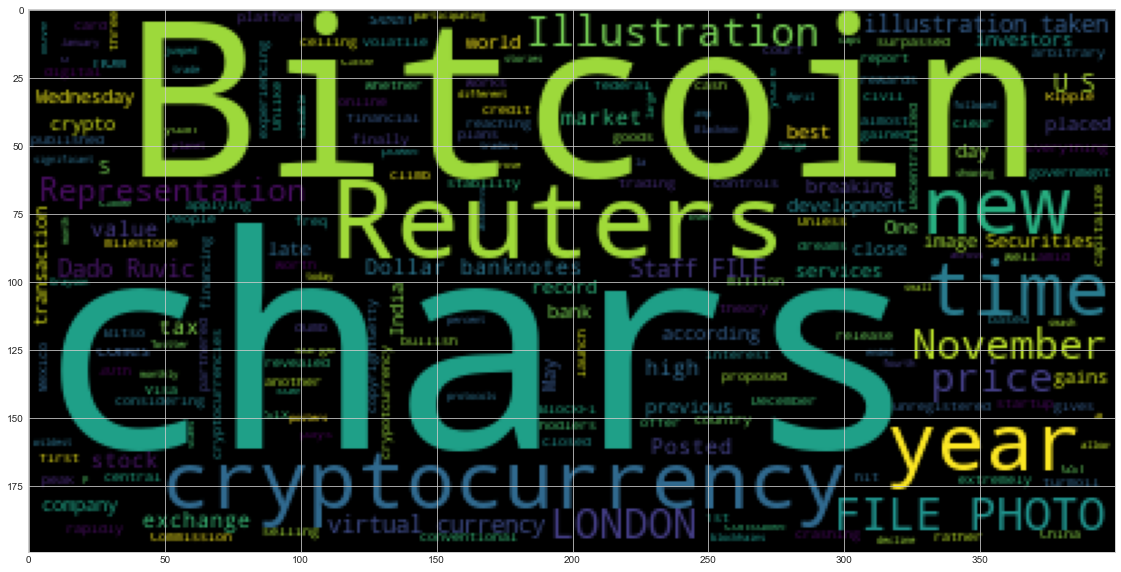

In [229]:
# Generate the Bitcoin word cloud
btc_input = ""
for word in btc_df.content:
    if word not in sw:
        btc_input += (" " + word)

wc = WordCloud().generate(btc_input)
plt.imshow(wc)

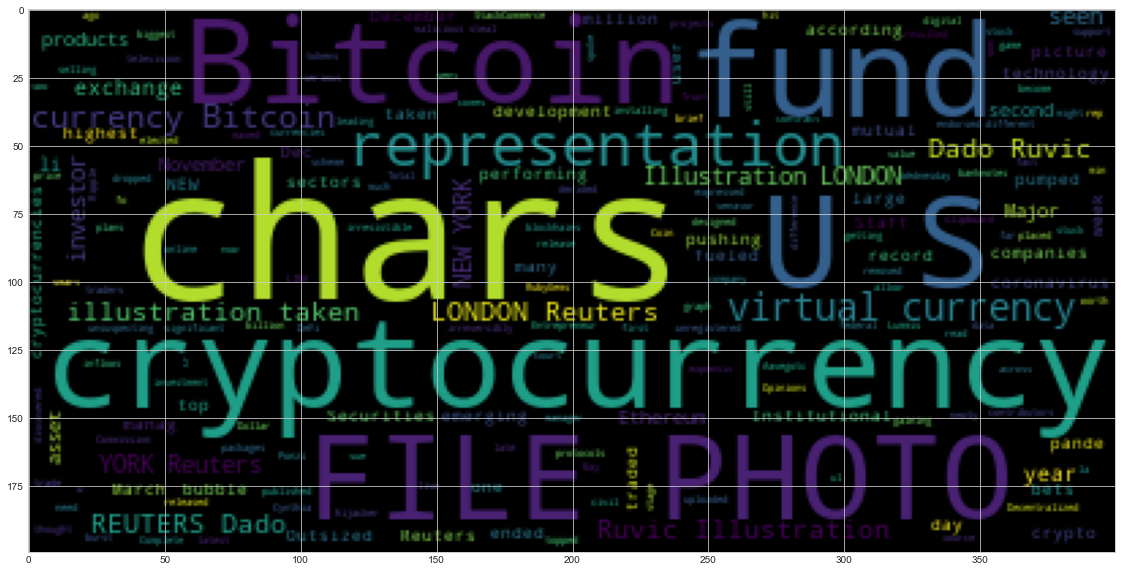

In [232]:
# Generate the Ethereum word cloud
eth_input = ""
for word in eth_df.content:
    if word not in sw:
        eth_input += (" " + word)

wc = WordCloud().generate(eth_input)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [233]:
import spacy
from spacy import displacy

In [235]:
# Optional - download a language model for SpaCy
#!python -m spacy download en_core_web_sm

In [236]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [239]:
# Concatenate all of the bitcoin text together
btc_input

" Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars] After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.\r\nBitcoins value has rapidly… [+1062 chars] Its been almost three years to the day since the price of Bitcoin was close to breaking the $20,000 ceiling and came crashing down. On Wednesday, the arbitrary milestone of hodlers dreams was finally… [+1273 chars] Everything is dumb until it works.\r\nAs 2020 comes to a close, the cryptocurrency world is experiencing another late-year surge of consumer interest as prices climb in value. Bitcoin is over $23,000 a… [+1705 chars] The government of India is considering an 18% tax on all bitcoin transactions, according to a new report from the Times of India. I

In [240]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_input)

# Add a title to the document
btc_ner.user_data['title'] = "Bitcoin NER"

In [241]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [243]:
# List all Entities
btc_entities = set([ent.text for ent in btc_ner.ents])
btc_entities

{'$62 million',
 '10.8 percent',
 '14,800',
 '18%',
 '20,000',
 '2020',
 '4',
 '500',
 '6',
 'April',
 'Bitcoin',
 'Business News',
 'Canadian',
 'Dado Ruvic/File Photo',
 'December 1st',
 'Decentralized',
 'Fergal Smith',
 'Fred Katayama',
 'Grayson Blackmon /',
 'India',
 'January 6, 2020',
 'John Vento',
 'LONDON',
 'Maiya Keidan',
 'May 26, 2020',
 'Mexico',
 'November',
 'November 19, 2020',
 'November 30th, 2020',
 'REUTERS/',
 'Reu',
 'Reuters',
 'Six years',
 'The Securities and Exchange Commission',
 'Twitter',
 'U.S.',
 'Visa',
 'Wednesday',
 'a year',
 'above $20,000',
 'almost three years',
 'bitcoin',
 'digital yuan',
 'first',
 'fourth',
 'late-year',
 'monthly',
 'more than 170%',
 'one',
 'over $23,000',
 'the People’s Bank of China',
 'the Times of India',
 'the day',
 'the year',
 'this week',
 'this year',
 'today'}

---

## Ethereum NER

In [244]:
# Concatenate all of the bitcoin text together
eth_input

" The Securities and Exchange Commission plans to sue Ripple in federal civil court for selling unregistered securities, according to a news release published online by the cryptocurrency company late … [+2950 chars] Bitcoin was once derided by serious investors as a bubble or a Ponzi scheme. But this year, it has become an irresistible investment for many of them.\xa0\r\nJust this Wednesday, bitcoin topped $20,000 fo… [+5208 chars] FILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - Major U.S.… [+1046 chars] FILE PHOTO: Representations of virtual currency Bitcoin are seen in this picture illustration taken taken March 13, 2020. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - Major U.S. cryptocurrency… [+1031 chars] FILE PHOTO: Representations of virtual currency Bitcoin are seen in this picture illustration taken taken March 13, 2020. REUTERS

In [245]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_input)

# Add a title to the document
eth_ner.user_data['title'] = "ETH NER"

In [246]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [247]:
# List all Entities
eth_entities = set([ent.text for ent in eth_ner.ents])
eth_entities

{'$429 million',
 '$5.6 billion',
 '15',
 '20,000',
 '2019',
 '2020',
 '4,005',
 '6 min',
 'A few days ago',
 'Aavegotc',
 'Bitcoin',
 'Coin',
 'Cynthia Lummis',
 'DeFi',
 'December',
 'December 2020',
 'Ethereum 2.0',
 'LONDON',
 'March 13, 2020',
 'May 26, 2020',
 'NEW YORK',
 'November 19, 2020',
 'One day',
 'REUTERS/',
 'Reuters',
 'RubyGems',
 'The Securities and Exchange Commission',
 'U.S.',
 'US',
 'Wednesday',
 'as much as 6%',
 'bitcoin',
 'first',
 'more than 600%',
 'over $50,000',
 'second',
 'the week ended Dec. 7',
 'the years',
 'this year',
 'two',
 'ul><li'}